## Pneumonia Detection

In [1]:
from keras.preprocessing import image

### Checking the images

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\piyus\AppData\Local\Temp\ipykernel_11180\2714365378.py:1: SyntaxWarning: invalid escape sequence '\P'
  testing_image = image.load_img('test\PNEUMONIA\person1_virus_6.jpeg',target_size=(128,128))


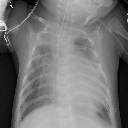

In [2]:
testing_image = image.load_img('test\PNEUMONIA\person1_virus_6.jpeg',target_size=(128,128))
testing_image

In [3]:
# Python code to read image
import cv2

# To read image from disk, we use 
# we use imread function, in below method
img = cv2.imread('chest_xray/train/NORMAL/IM-0115-0001.jpeg')
print(img)

[[[ 22  22  22]
  [ 24  24  24]
  [ 24  24  24]
  ...
  [ 96  96  96]
  [ 94  94  94]
  [ 93  93  93]]

 [[ 23  23  23]
  [ 24  24  24]
  [ 24  24  24]
  ...
  [ 97  97  97]
  [ 94  94  94]
  [ 92  92  92]]

 [[ 24  24  24]
  [ 24  24  24]
  [ 23  23  23]
  ...
  [ 99  99  99]
  [ 96  96  96]
  [ 94  94  94]]

 ...

 [[ 49  49  49]
  [ 50  50  50]
  [ 48  48  48]
  ...
  [119 119 119]
  [119 119 119]
  [119 119 119]]

 [[ 50  50  50]
  [ 52  52  52]
  [ 53  53  53]
  ...
  [123 123 123]
  [124 124 124]
  [123 123 123]]

 [[ 52  52  52]
  [ 53  53  53]
  [ 54  54  54]
  ...
  [129 129 129]
  [128 128 128]
  [127 127 127]]]


In [4]:
# The image data is stored in array, which is basically pixel value ranging from 0 - 255
# To normalize the data we divide it from 255 or 256, making it ranging from 0 to 1

In [5]:
# The ImageDataGenerator class in Keras provides a convenient way to perform real-time data augmentation on image datasets during model training.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Preprocess the data
train_datagen = ImageDataGenerator(rescale= 1.0/255,
                                   shear_range= 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip = True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [8]:
ref = {"dir_train": "chest_xray/train",
       "dir_test": "chest_xray/test"}

In [9]:
# Let's create our images
training_set = train_datagen.flow_from_directory(ref["dir_train"],target_size=(64,64),batch_size=32,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [10]:
test_set = test_datagen.flow_from_directory(ref["dir_test"],target_size=(64,64),batch_size=32,class_mode='binary')

Found 624 images belonging to 2 classes.


In [11]:
print(training_set.class_indices)
# Binary Classification, 0 for Normal and 1 for Pneumonia

{'NORMAL': 0, 'PNEUMONIA': 1}


### CNN Model

Will make CNN model in these 5 steps:<br>
1) Input the Data<br>
2) conv<br>
3) Max Pooling<br>
4) Flatten<br>
5) ANN

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout

In [13]:
# Model
Model = Sequential()

In [14]:
# Adding a convolution layer
Model.add(Conv2D(32,(3,3), input_shape = (64,64,3), activation = 'relu'))

c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
# Pooling Layer
Model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
# Adding a convolution layer
Model.add(Conv2D(16,(3,3), activation='relu'))

In [17]:
# Pooling Layer
Model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
# Flatten Layer
Model.add(Flatten())

In [19]:
# ANN will take Flatten data as input
# Flatten data size = 16*16 = 256

In [20]:
# Full connection layer
Model.add(Dense(units=128, activation='relu'))
Model.add(Dense(units = 64, activation='relu'))
Model.add(Dense(units= 1, activation='sigmoid'))

In [21]:
# Model Compile
Model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [30]:
# For keras in case we use image data generator we will prefer
# Model.fit_generator
Model.fit(training_set, steps_per_epoch= 42,
                    epochs = 5,
                    validation_data= test_set,
                    validation_steps = 11)

Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 377ms/step - accuracy: 0.8912 - loss: 0.2509 - val_accuracy: 0.8750 - val_loss: 0.3368
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 328ms/step - accuracy: 0.8916 - loss: 0.2827 - val_accuracy: 0.7500 - val_loss: 0.5423
Epoch 3/5
 3/42 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8924 - loss: 0.2586

c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 345ms/step - accuracy: 0.8930 - loss: 0.2476 - val_accuracy: 0.8381 - val_loss: 0.3336
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step - accuracy: 0.8912 - loss: 0.2566 - val_accuracy: 0.8088 - val_loss: 0.3817
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 24s 513ms/step - accuracy: 0.8994 - loss: 0.2280 - val_accuracy: 0.8551 - val_loss: 0.3242


In [23]:
# Test an image
import numpy as np
from keras.preprocessing import image

In [31]:
# We will perform basic preprocessing 
testing_image = image.load_img("chest_xray/test/NORMAL/IM-0009-0001.jpeg", target_size=(64,64))

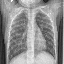

In [32]:
testing_image

In [33]:
test_image = image.img_to_array(testing_image)
test_img = np.expand_dims(test_image,axis=0)
pred = Model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [34]:
ref = {0: "Normal", 1:"Pneumonia"}
print("My image is classified as :", ref[int(pred[0][0])])

My image is classified as : Normal


In [28]:
Model.save('model.h5')